In [70]:
%matplotlib inline 

#Facial Recognition Using Eigenfaces

In this notebook, we will create a simple facial recognition program. We will be using the **faces94** dataset. First we need our to import the necessary libraries.

In [71]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import random

###Load Faces Dataset
We begin by creating a function to load all the faces. The code we will be using traverses through the given directory and loads all JPEG images. The images are flattened and then stored vertically in a matrix. For convenience, we will make the default path be the **./faces94** directory.

In [72]:
def getFaces(path='./faces94'):
    """Traverse the directory specified by 'path' and return an array containing
    one column vector per subdirectory.
    """
    # Traverse the directory and get one image per subdirectory
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix
    return np.array(faces).T

###Show an image
You probably want to see what the faces look like. The following function will take a flattened image and display it.

In [73]:
def show(im, w=200, h=180):
    """Plot the flattened grayscale image 'im' of width 'w' and height 'h'."""
    plt.imshow(im.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()

For convenience, the following function **show2** will show two images side-by-side.

In [74]:
def show2(test_image, result, w=200, h=180):
    """Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side
    """
    plt.subplot(121)
    plt.title("Inputed Image")
    plt.imshow(test_image.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.subplot(122)
    plt.title("Closest Match")
    plt.imshow(result.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.show()

###Performing a Mean Shift on the Faces
To accentuate the unique features of each of the faces, we will perform a mean shift. First, we must calculate the mean face. We will store the faces using our **getFaces** function and then calculate the mean face $\mu$. The mean face is plotted below.
####Calculate the Mean Face

Here we define the FacialRec class, which provides us with the necessary functions to determine which face in our "faces94" file most closely matches an inputted face.

In [80]:
class FacialRec:
    ##########Members##########
    # F, mu, Fbar, and U
    ###########################
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = getFaces(path)
        print self.F.shape
    def initMeanImage(self):
        self.mu = np.mean(self.F,axis = 1)
    def initDifferences(self):
        self.Fbar = self.F - np.vstack(self.mu)
    def initEigenfaces(self):
        self.U,s,Vt = la.svd(self.Fbar,full_matrices=False)
    def project(self, A, s=38):
        return np.dot(self.U[:,:s].T,A)
    def findNearest(self, image, s=38):
        #Fhat = project(self.U,image.np.vstack(image[:,i]-self.mu))
        Fhat = self.project(self.Fbar,s)
        ghat = np.vstack(self.project(image-self.mu,s))
        difference = Fhat-ghat
        m,n = difference.shape
        norms = [np.linalg.norm(difference[:,i]) for i in xrange(n)]
        return np.argmin(norms)

In [81]:
%matplotlib inline

Next, we plot the mean face of all the images in "faces94."

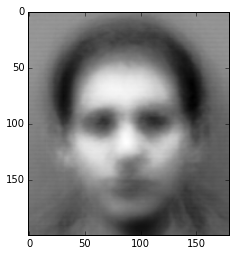

In [82]:
show(face.mu)

Then, we compute and print out the mean-shifted face vectors.

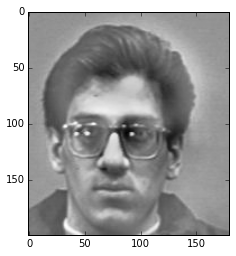

In [83]:
show(face.Fbar[:,28])

And, this function plots the first eigenface, which is the first column of our matrix U, obtained by calculating the SVD of the mean-shifted images.

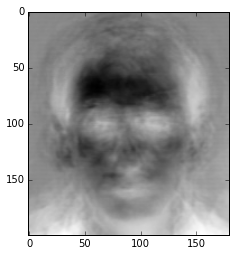

In [84]:
show(face.U[:,0])

...
...

Using the cells above and below as examples, continue solving the Facial Recognition problem below, iPython-notebook style.

...
...

###Wrapping Up
When we've finished our code, we can verify that everything works by testing on random images. The following will pull 5 images at random from the dataset.

####Create Sample Set of Faces

In [76]:
def sampleFaces(n_tests, path="./faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)

    #Get a sample of the images
    test_files = random.sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

test_images = sampleFaces(5)

Lastly, we test our function which receives five inputted images and computes the closest match from our data set, "faces94"".

(36000L, 153L)


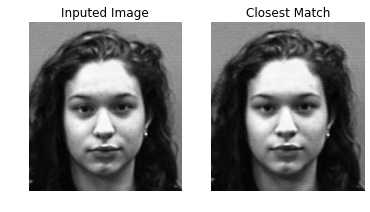

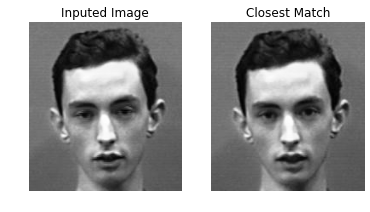

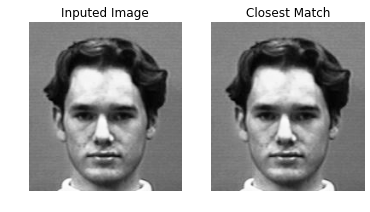

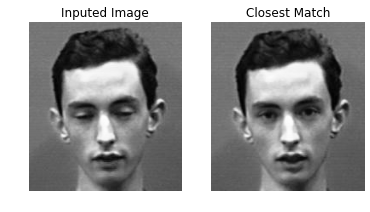

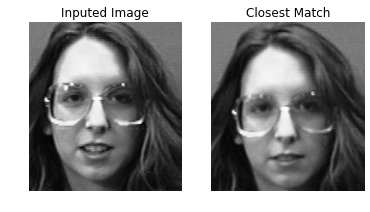

In [79]:
face = FacialRec("./faces94")
for i in xrange(5): 
    nearest_match = face.findNearest(test_images[:,i])
    show2(test_images[:,i],face.F[:,nearest_match])